In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Creditcardchurn.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              7081 non-null   int64  
 1   Gender                    7081 non-null   object 
 2   Dependent_count           7081 non-null   int64  
 3   Education_Level           7081 non-null   object 
 4   Marital_Status            7081 non-null   object 
 5   Income_Category           7081 non-null   object 
 6   Card_Category             7081 non-null   object 
 7   Months_on_book            7081 non-null   int64  
 8   Total_Relationship_Count  7081 non-null   int64  
 9   Months_Inactive_12_mon    7081 non-null   int64  
 10  Contacts_Count_12_mon     7081 non-null   int64  
 11  Credit_Limit              7081 non-null   float64
 12  Total_Trans_Amt           7081 non-null   int64  
 13  Total_Trans_Ct            7081 non-null   int64  
 14  Avg_Util

In [3]:
churn = data[data["Churn"] == 1]
exist = data[data["Churn"] == 0]

### Bivariate Numerical

In [4]:
def dplots(churn, exist, variable):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,7))

    sns.distplot(churn[variable], bins=30, ax=ax1)
    ax1.set_xlabel(" ")
    ax1.set_title('Churn')

    sns.boxplot(y=churn[variable], ax=ax2)
    ax2.set_title('Boxplot')

    sns.distplot(exist[variable], bins=30, ax=ax3)
    ax2.set_title('')
        
    sns.boxplot(y=exist[variable], ax=ax4)
    
    plt.show()

In [5]:
def hist(churn, exist, variable):
    plt.figure(figsize=(10, 5))
    
    plt.hist(churn[variable], bins=30, alpha=0.45, color='red')
    plt.hist(exist[variable], bins=30, alpha=0.45, color='blue')
    plt.title("Distribution of Average Utilization Ratio by Churn")
    plt.legend(['Churned', 
            'Existing'])
    plt.show()

In [6]:
def boxplot(df, variable):
    plt.figure(figsize=(10,5))
    
    plot = sns.boxplot(y=df[variable], x=df["Churn"])

    plt.show()

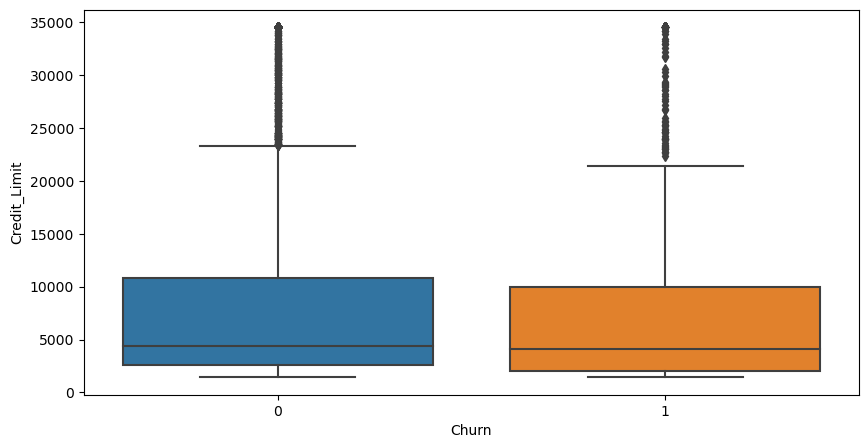

In [7]:
boxplot(data, "Credit_Limit")

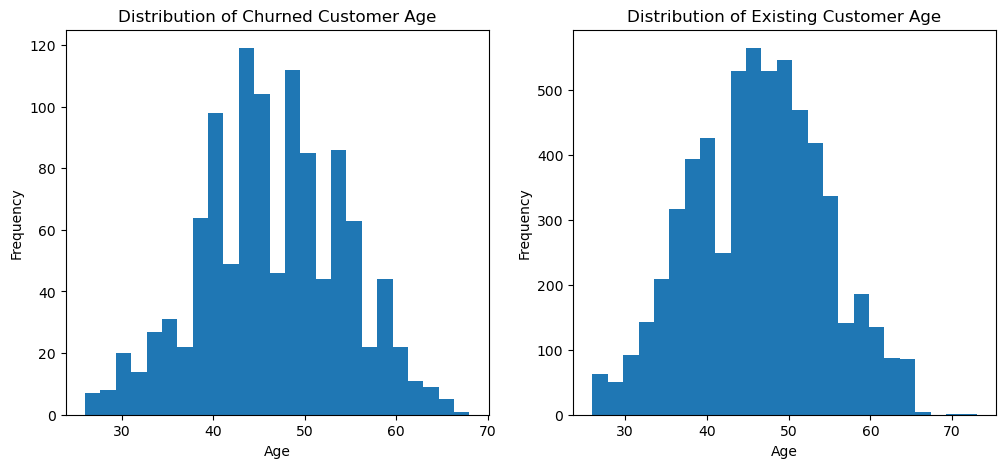

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.hist(churn["Customer_Age"], bins = 25)
ax1.set_title("Distribution of Churned Customer Age")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

ax2.hist(exist["Customer_Age"], bins = 25)
ax2.set_title("Distribution of Existing Customer Age")
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency")

plt.show()

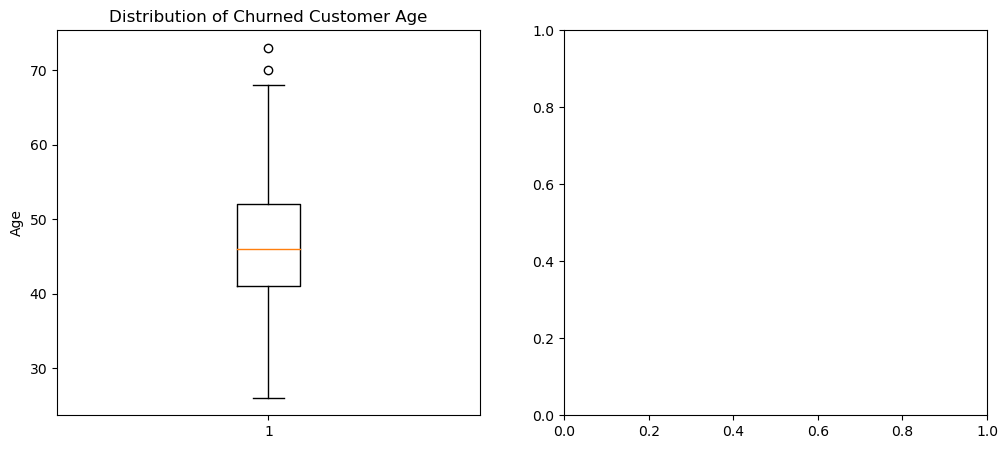

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.boxplot(data["Customer_Age"])
ax1.set_title("Distribution of Churned Customer Age")
ax1.set_ylabel("Age")


plt.show()

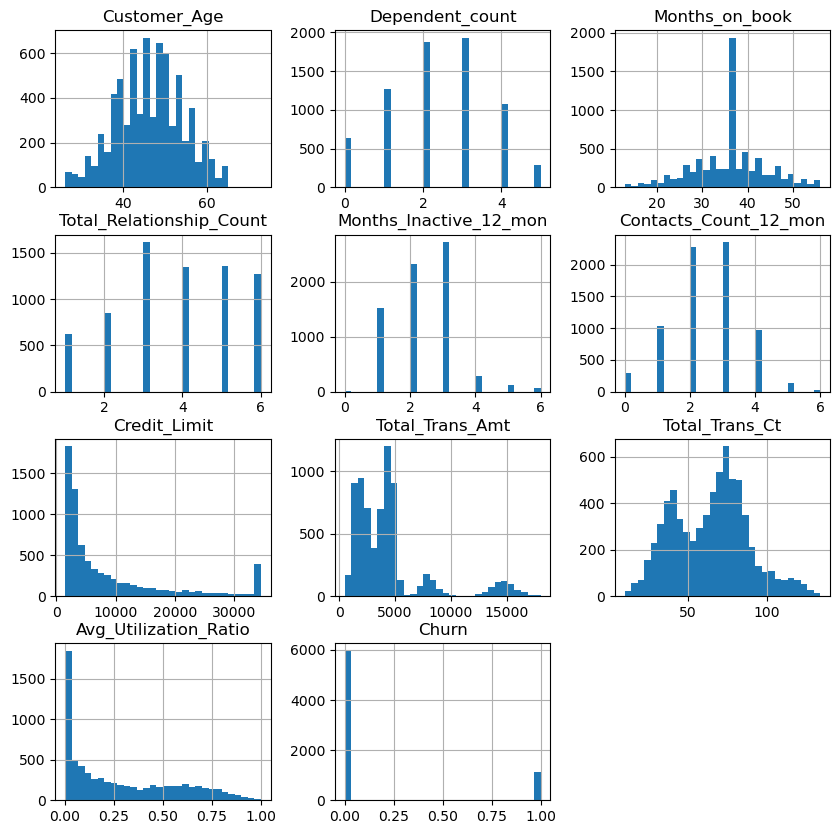

In [10]:
num = [c for c in data.columns if data[c].dtypes!='O']
data[num].hist(bins=30, figsize=(10,10))
plt.show()

In [11]:
features = ["Dependent_count", "Total_Relationship_Count", "Months_Inactive_12_mon",
      "Contacts_Count_12_mon"]

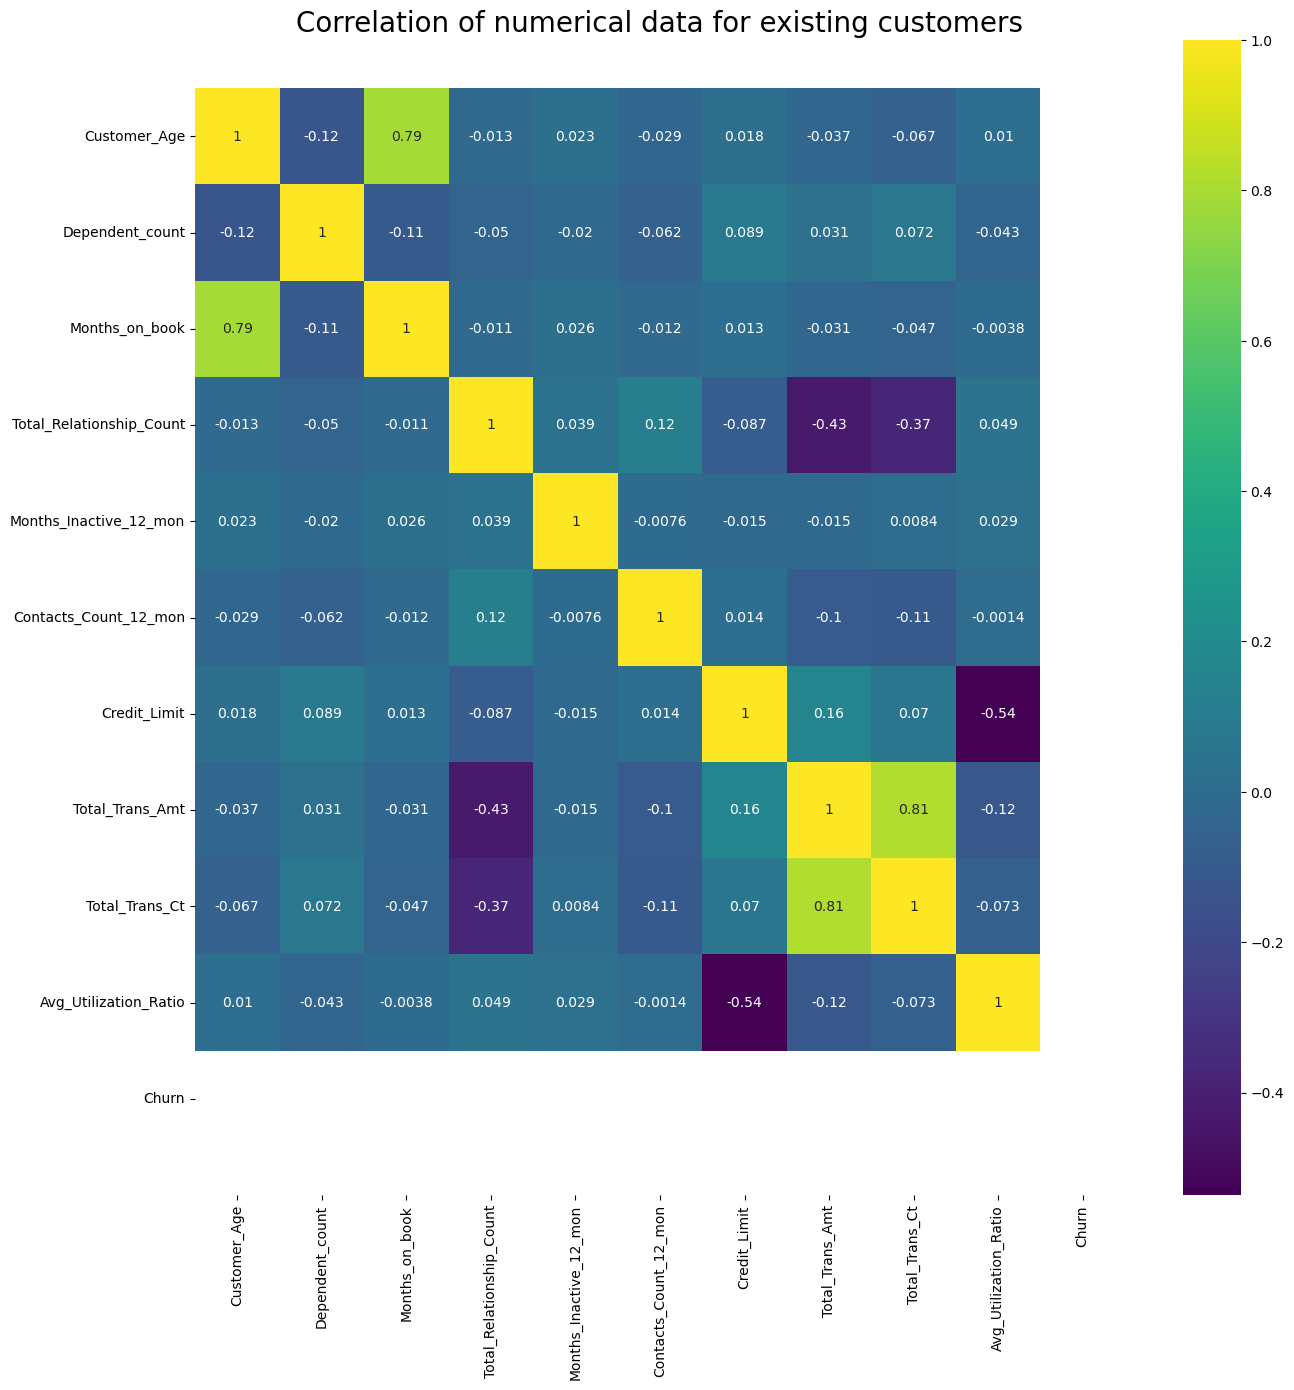

In [29]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of numerical data for existing customers', size=20)
ax = sns.heatmap(exist[num].astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

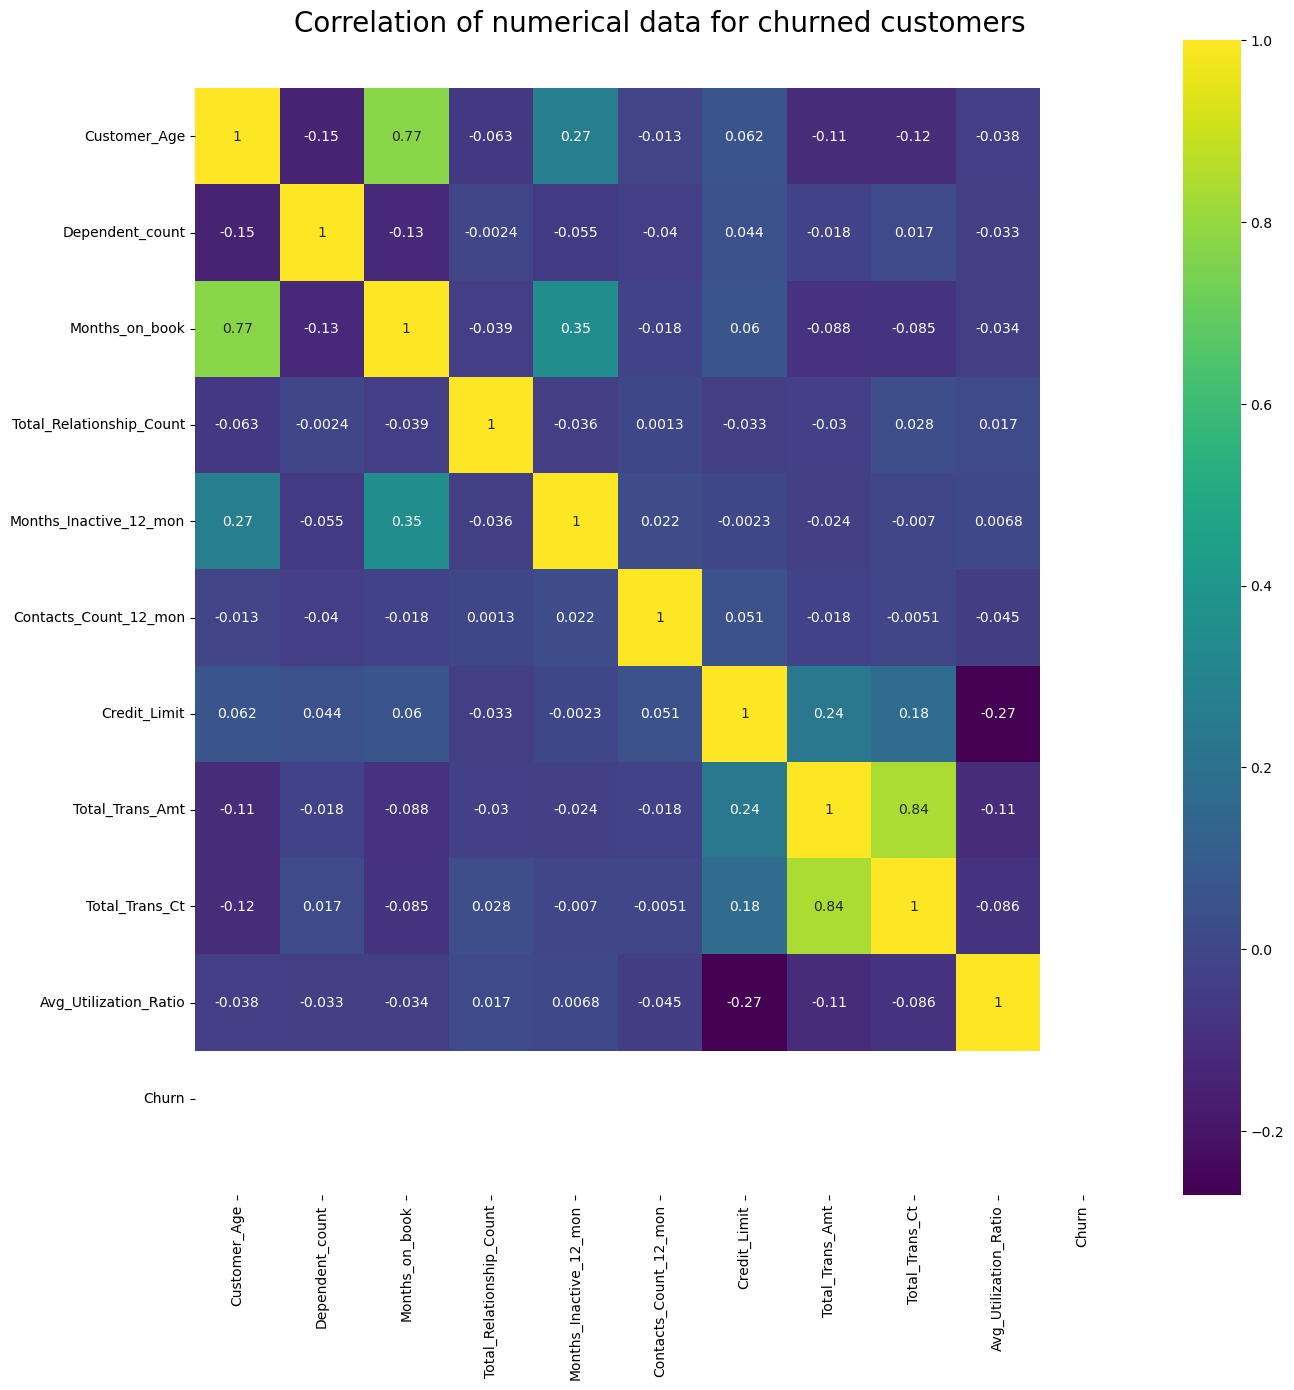

In [28]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of numerical data for churned customers', size=20)
ax = sns.heatmap(churn[num].astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- total trans amt vs total relationship ct = -0.35
- ave utilization ratio vs credit limit = -0.48


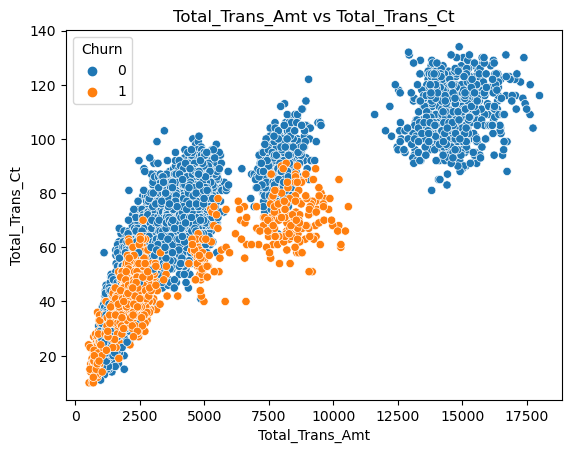

In [14]:
def scatter(df, x, y):
    sns.scatterplot(data=df, x=x, y=y, hue="Churn")
    plt.title(x + " vs " + y)
    plt.show()
scatter(data, "Total_Trans_Amt", "Total_Trans_Ct")

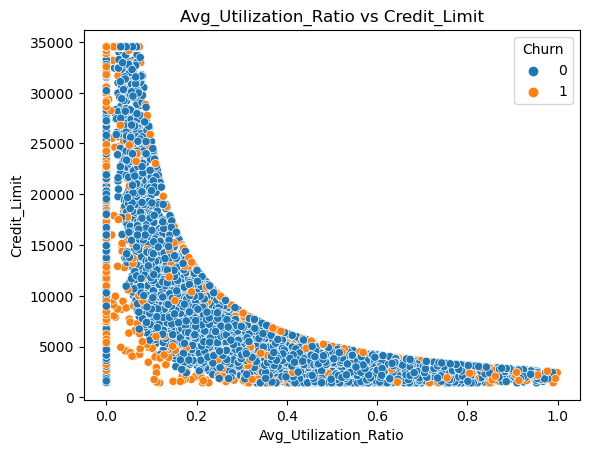

In [15]:
scatter(data, "Avg_Utilization_Ratio", "Credit_Limit")

In [16]:
mean = churn["Customer_Age"].groupby(data["Months_on_book"]).mean()

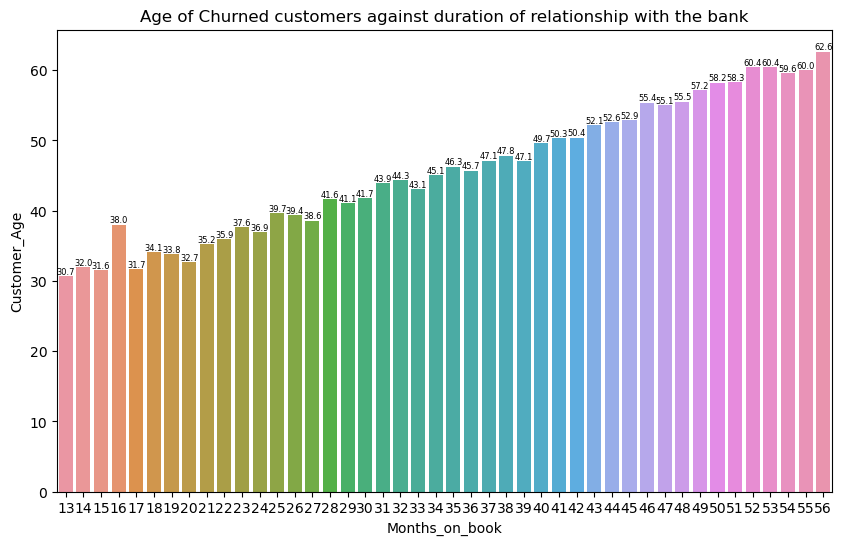

In [27]:
plt.figure(figsize = (10,6))
plt.title("Age of Churned customers against duration of relationship with the bank")
ax = sns.barplot(data=churn, x="Months_on_book", y="Customer_Age", ci = None)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize = 6)
plt.show()

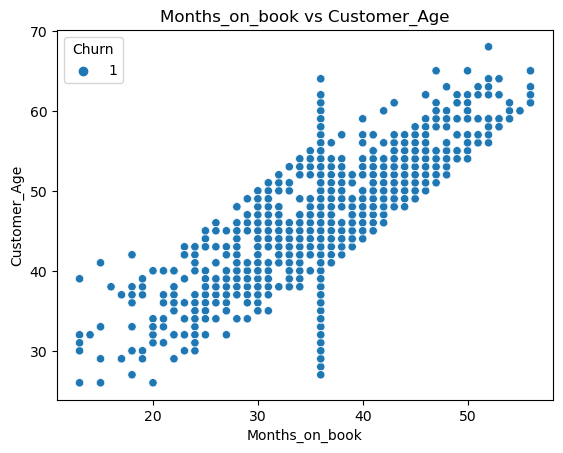

In [18]:
scatter(churn, "Months_on_book", "Customer_Age")

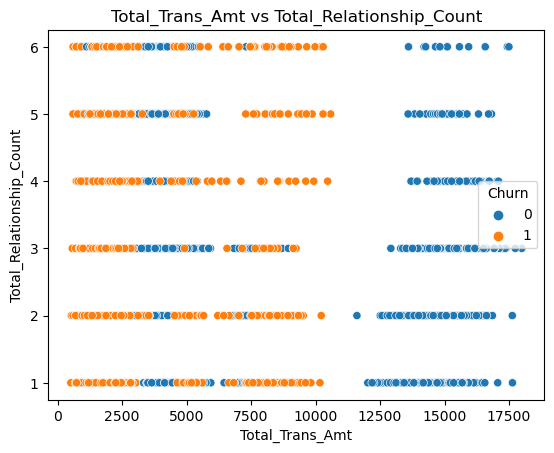

In [19]:
scatter(data, "Total_Trans_Amt", "Total_Relationship_Count")

In [58]:
scatter(data, "Total_Trans_Amt", "Credit_Limit")

TypeError: scatter() missing 1 required positional argument: 'hue'

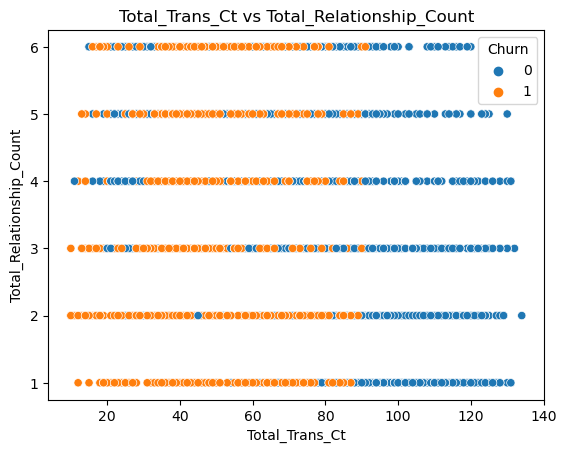

In [21]:
scatter(data, "Total_Trans_Ct", "Total_Relationship_Count")

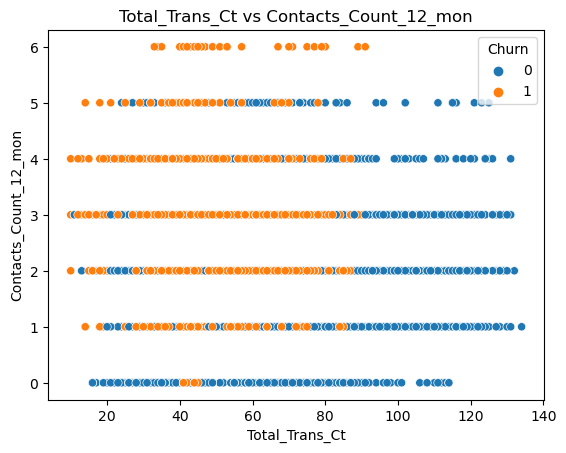

In [22]:
scatter(data, "Total_Trans_Ct", "Contacts_Count_12_mon")

<AxesSubplot:xlabel='Customer_Age', ylabel='Months_Inactive_12_mon'>

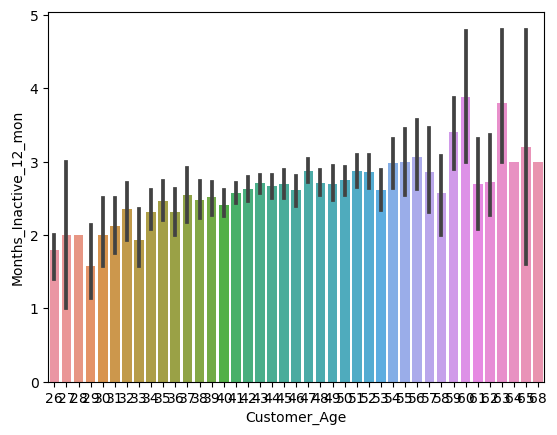

In [35]:
sns.barplot(data=churn, x="Customer_Age", y="Months_Inactive_12_mon")

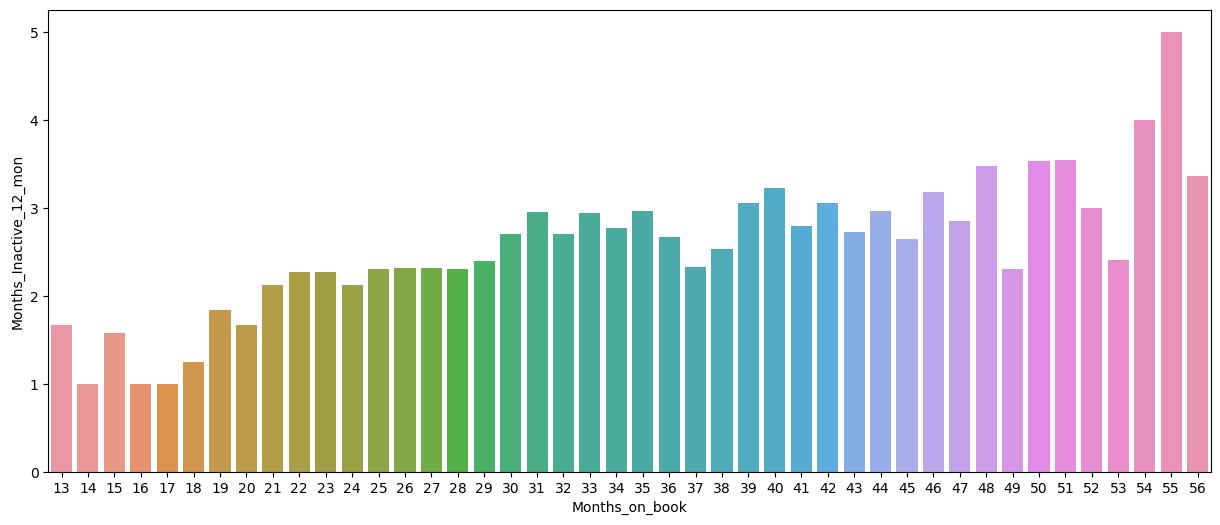

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(data=churn, x="Months_on_book", y="Months_Inactive_12_mon", ci=None)
plt.show()

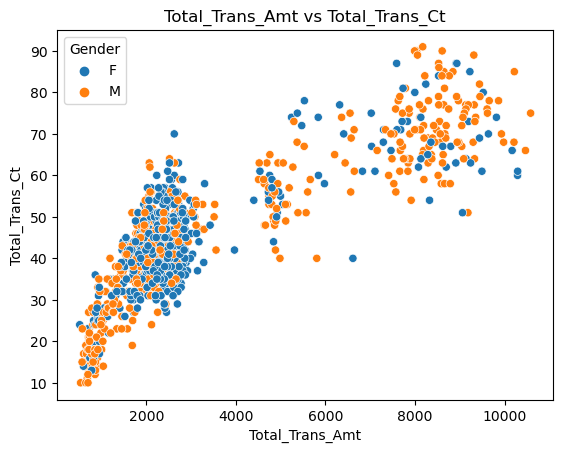

In [43]:
def scatter(df, x, y, hue):
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.title(x + " vs " + y)
    plt.show()
scatter(churn, "Total_Trans_Amt", "Total_Trans_Ct", "Gender")

In [53]:
import plotly.express as px
from sklearn.decomposition import PCA
def Pca(df, x,y,z,hue):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df[num])

    total_var = pca.explained_variance_ratio_.sum() * 100

    fig = px.scatter_3d(
        components, x=0, y=1, z=2, color=df[hue],
        title=f'Total Explained Variance: {total_var:.2f}%',
        labels={'0': x, '1': y, '2': z}
    )
    fig.show()

In [61]:
Pca(churn, "Months_on_book", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Card_Category")